In [ ]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import os
import IPython
import glob
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score
import glob
#import parselmouth


# MFCC

In [ ]:
myfolder_train="/content/drive/MyDrive/mini project/Z_Merged"

In [ ]:
def getwavefile(path):
  # print(path)
  wavefile=glob.glob(path + "/*.wav")
  return wavefile

In [ ]:
data=getwavefile(myfolder_train)

In [ ]:
df=pd.DataFrame(data,columns=['Filename'])

In [ ]:
df

,Filename
0,/content/drive/MyDrive/mini project/Z_Merged/T...
1,/content/drive/MyDrive/mini project/Z_Merged/T...
2,/content/drive/MyDrive/mini project/Z_Merged/T...
3,/content/drive/MyDrive/mini project/Z_Merged/T...
4,/content/drive/MyDrive/mini project/Z_Merged/T...
...,...
2505,/content/drive/MyDrive/mini project/Z_Merged/C...
2506,/content/drive/MyDrive/mini project/Z_Merged/C...
2507,/content/drive/MyDrive/mini project/Z_Merged/C...
2508,/content/drive/MyDrive/mini project/Z_Merged/C...


# Checking the signal and sample rate from the directory

In [ ]:
path = "/content/drive/MyDrive/mini project/Z_Merged"

# Change the directory
os.chdir(path)
path

'/content/drive/MyDrive/mini project/Z_Merged'

In [ ]:
path1=os.listdir()


In [ ]:
def preprocess(signal, samplerate):
    print('Sample rate: ', samplerate)
    sum=0
    for i in range(len(signal)):
        sum = sum+signal[i]
    print('sum : ', sum)

In [ ]:
def read_wav_file(path):
    wave=glob.glob(path + "/*.wav")
    for i in wave:
      print('wave : ', i)
      signal, sample_rate=librosa.load(i)
      print('length : ', len(signal))
      preprocess(signal, sample_rate)
      print('signal :', signal)

      print('--------------------------------------------------------------------------')

In [ ]:
path = '/content/drive/MyDrive/mini project/Z_Merged'
read_wav_file(path)

Streaming output truncated to the last 5000 lines.
length :  44083
Sample rate:  22050
sum :  0.984405517578125
signal : [ 0.00567627  0.00564575  0.00561523 ... -0.03100586 -0.12594604
 -0.21524048]
--------------------------------------------------------------------------
wave :  /content/drive/MyDrive/mini project/Z_Merged/SA-Eb5-n-mf-2.wav
length :  44083
Sample rate:  22050
sum :  -0.728759765625
signal : [ 0.          0.          0.         ... -0.22744751 -0.37304688
 -0.4250183 ]
--------------------------------------------------------------------------
wave :  /content/drive/MyDrive/mini project/Z_Merged/SA-Eb3-n-ff-2.wav
length :  44083
Sample rate:  22050
sum :  -1.67718505859375
signal : [ 0.00027466  0.00027466  0.00027466 ... -0.06619263 -0.08621216
 -0.09420776]
--------------------------------------------------------------------------
wave :  /content/drive/MyDrive/mini project/Z_Merged/SA-F4-n-FF-1.wav
length :  50160
Sample rate:  22050
sum :  16.32635498046875
signal

# Labelling and dataframe


In [ ]:
path="/content/drive/MyDrive/mini project/Z_Merged"

In [ ]:
myfolder="/content/drive/MyDrive/mini project/Z_Merged"

In [ ]:
def getwavfile(path):
  wave_file = glob.glob(path +"/*.wav")
  return wave_file

In [ ]:
data = getwavfile(myfolder)


In [ ]:
wave_file = glob.glob(myfolder +"/*.wav")
names=[]
label_list=[]
for h in wave_file:
  k=h.split("Z_Merged/")
  names.append(k[1])
  # print(k[1][0])
  if k[1][0]=='S' and  k[1][1]=='A':
    label_list.append("Alto Saxophone")
  elif k[1][0]=='C' and  k[1][1]=='L':
    label_list.append("Cello")
  elif k[1][0]=='C' and k[1][1]=='B':
    label_list.append("Clarinet")
  elif k[1][0]=='C' and k[1][1]=='T':
    label_list.append("Double Bass")
  elif k[1][0]=='F' and k[1][1]=='L':
    label_list.append("Flute")
  elif k[1][0]=='T' and k[1][1]=='P':
    label_list.append("French horn")
  elif k[1][0]=='G' and k[1][1]=='I':
    label_list.append("Guitar")
  elif k[1][0]=='O' and k[1][1]=='B':
    label_list.append("Oboe")
  elif k[1][0]=='S' and k[1][1]=='S':
    label_list.append("Soprano saxophone")
  elif k[1][0]=='T' and k[1][1]=='B':
    label_list.append("Trombone")
  elif k[1][0]=='T' and k[1][1]=='R':
    label_list.append("Trumpet")
  elif k[1][0]=='T' and k[1][1]=='U':
    label_list.append("Tuba")
  elif k[1][0]=='V' and k[1][1]=='A':
    label_list.append("Viola")
  elif k[1][0]=='V' and k[1][1]=='L':
    label_list.append("Violin")

In [ ]:
df1 = pd.DataFrame(data, columns = ["wave_file"])

In [ ]:
df2 = pd.DataFrame(names, columns = ["names"])

In [ ]:
df3 = pd.DataFrame(label_list, columns = ["label_list"])

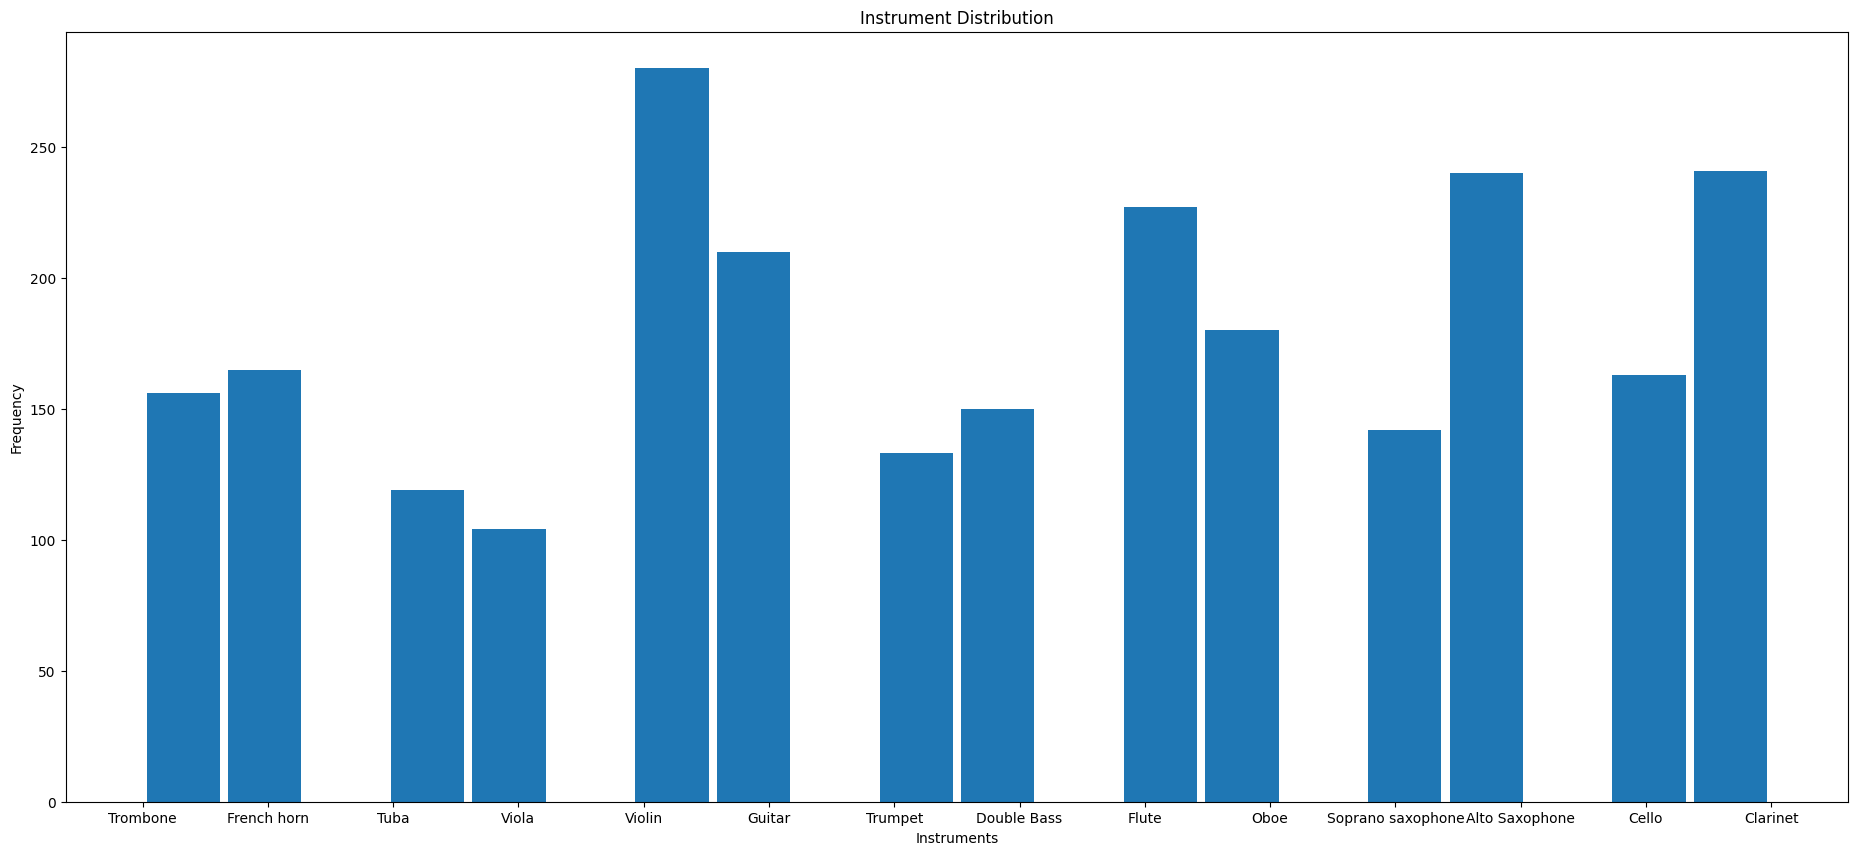

In [ ]:
import matplotlib.pyplot as plt



for column in df3.columns:
    plt.figure(figsize=(23, 10))  # Adjust the figsize as needed
    plt.hist(df3[column], bins=20, rwidth=0.9)
    plt.title("Instrument Distribution")
    plt.xlabel("Instruments")
    plt.ylabel("Frequency")
    plt.show()


In [ ]:
os.listdir(path)
labels=os.listdir(path)
labels

['TB-G4-n-ff-2.wav',
 'TP-A2-n-ff-2.wav',
 'TB-F4-br-ff-2.wav',
 'TP-Ab3-n-pp-2.wav',
 'TP-A4-n-mf-2.wav',
 'TB-F3-n-ff-2.wav',
 'TP-A4-n-pp-2.wav',
 'TB-F2-br-ff-2.wav',
 'TB-F2-n-pp-2.wav',
 'TP-A4-n-ff-1.wav',
 'TB-G4-n-mf-2.wav',
 'TP-Db4-n-ff-2.wav',
 'TP-Db4-n-pp-2.wav',
 'TP-Bb1-n-mf-2.wav',
 'TP-D4-n-ff-1.wav',
 'TP-D3-n-ff-2.wav',
 'TP-Db3-n-pp-1.wav',
 'TP-D4-n-ff-2.wav',
 'TP-Db4-n-mf-2.wav',
 'TP-Db4-n-ff-1.wav',
 'TP-Bb3-n-ff-2.wav',
 'TP-D2-n-ff-2.wav',
 'TP-D3-n-mf-2.wav',
 'TP-Db2-n-pp-2.wav',
 'TP-D4-n-pp-2.wav',
 'TP-Db2-n-mf-2.wav',
 'TP-B2-n-pp-2.wav',
 'TP-D2-n-pp-2.wav',
 'TP-B2-n-ff-2.wav',
 'TP-B2-n-mf-2.wav',
 'TP-Bb4-n-ff-2.wav',
 'TP-B3-n-pp-1.wav',
 'TP-Bb3-n-mf-2.wav',
 'TP-D2-n-mf-2.wav',
 'TP-D5-n-pp-2.wav',
 'TP-C2-n-mf-2.wav',
 'TP-D4-n-mf-2.wav',
 'TP-D3-n-pp-2.wav',
 'TP-Bb2-n-ff-2.wav',
 'TP-Bb4-n-pp-2.wav',
 'TP-Bb2-n-mf-2.wav',
 'TP-Db2-n-ff-2.wav',
 'TP-C3-n-mf-2.wav',
 'TP-D5-n-mf-2.wav',
 'TP-Bb3-n-pp-2.wav',
 'TP-Db3-n-mf-1.wav',
 'TP-Bb3-n-mf-

In [ ]:
labels=os.listdir()

In [ ]:
df = pd.concat([df1,df2,df3],axis=1)

In [ ]:
csv_data = df.to_csv(header=True)

# MFCC

In [ ]:
y, sr = librosa.load("/content/drive/MyDrive/mini project/Z_Merged/CB-A3-n-FF-1.wav",sr=1000)
y

array([8.4924430e-04, 1.5569666e-03, 1.9964981e-03, ..., 4.8193906e-06,
       4.6800423e-04, 1.5705297e-04], dtype=float32)

In [ ]:
g=librosa.feature.mfcc(y=y, sr=sr, n_mfcc=12)

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=2021
  warnings.warn(


In [ ]:
g

array([[-4.3262564e+02, -4.2282904e+02, -4.2999792e+02, -4.1262045e+02],
       [ 5.6553848e+01,  4.8282177e+01,  4.6135170e+01,  4.3256653e+01],
       [-3.0068922e+01, -2.0169147e+01, -1.0670078e+01, -2.6624302e+01],
       [-1.6793846e+01, -2.1122897e+00,  8.5590229e+00,  2.4434847e-01],
       [ 5.2799084e+01,  4.6988487e+01,  3.4766449e+01,  4.9709015e+01],
       [ 5.4412125e+01,  5.4210682e+01,  4.3769386e+01,  5.3637604e+01],
       [-2.6652163e+01, -2.5880543e+01, -1.8864944e+01, -2.3526224e+01],
       [-1.8843948e+01, -2.0678398e+01, -1.6904606e+01, -2.2330425e+01],
       [-1.5808078e+01, -1.2788973e+01, -1.0396684e+01, -1.1985142e+01],
       [ 5.6632629e+01,  5.2973469e+01,  4.1821373e+01,  4.8814156e+01],
       [-1.5547871e+01, -1.0637585e+01, -4.7156916e+00, -5.3084793e+00],
       [-1.8138760e+01, -1.8693506e+01, -1.5216740e+01, -1.6286654e+01]],
      dtype=float32)

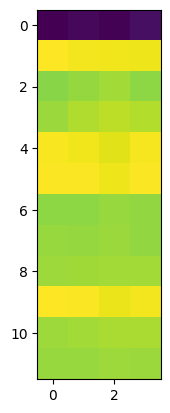

In [ ]:
g.shape
plt.imshow(g)

In [ ]:
scale_feature=[]
for i in df['wave_file']:
  # print(i)
  # librosa.load(i)

  signal,sample_rate=librosa.load(i)
  g=librosa.feature.mfcc(y=signal,sr=sample_rate,n_mfcc=12)

  mfcc_scaled=np.mean(g.T,axis=0)
  scale_feature.append(mfcc_scaled)

In [ ]:
  scale_feature

[array([-378.56287 ,   64.11193 ,  -56.815857,  -23.819674,  -25.97044 ,
         -23.923975,  -22.850641,  -16.96195 ,  -17.770706,  -16.103083,
         -13.194684,   -9.934724], dtype=float32),
 array([-299.84653  ,  171.48581  ,  -67.063255 ,   31.610025 ,
          -6.439918 ,  -13.6953335,  -21.80495  ,  -19.105515 ,
         -10.690824 ,   -9.43228  ,  -17.038414 ,   -5.0627255],
       dtype=float32),
 array([-273.99545 ,  -24.769262,  -40.57588 ,  -14.348162,  -38.159973,
          -7.821725,  -24.87844 ,  -10.688063,  -12.952185,   -6.292155,
         -12.959389,   -7.395941], dtype=float32),
 array([-438.1412    ,  151.8393    ,   37.301105  ,   24.950106  ,
         -18.143791  ,  -27.56434   ,  -11.425448  ,  -16.658848  ,
          -3.818694  ,    0.55464417,  -22.375854  ,   -4.751468  ],
       dtype=float32),
 array([-446.88354  ,   92.40511  ,    1.8027842,  -14.635609 ,
         -35.202602 ,  -33.184807 ,  -27.096191 ,  -27.520306 ,
         -12.470867 ,  -11.3018675

# MFCC Dataframe

In [ ]:
df_mfcc=pd.DataFrame(scale_feature)

In [ ]:
df_mfcc

,0,1,2,3,4,5,6,7,8,9,10,11
0,-378.562866,64.111931,-56.815857,-23.819674,-25.970440,-23.923975,-22.850641,-16.961950,-17.770706,-16.103083,-13.194684,-9.934724
1,-299.846527,171.485809,-67.063255,31.610025,-6.439918,-13.695333,-21.804951,-19.105515,-10.690824,-9.432280,-17.038414,-5.062726
2,-273.995453,-24.769262,-40.575878,-14.348162,-38.159973,-7.821725,-24.878441,-10.688063,-12.952185,-6.292155,-12.959389,-7.395941
3,-438.141205,151.839294,37.301105,24.950106,-18.143791,-27.564341,-11.425448,-16.658848,-3.818694,0.554644,-22.375854,-4.751468
4,-446.883545,92.405113,1.802784,-14.635609,-35.202602,-33.184807,-27.096191,-27.520306,-12.470867,-11.301867,-21.546511,-8.698571
...,...,...,...,...,...,...,...,...,...,...,...,...
2505,-198.895569,117.532005,-14.359482,12.552975,12.689218,17.823339,18.807043,-3.000129,-16.960251,-2.437153,1.030669,-1.540760
2506,-160.315674,60.430435,-3.037581,8.526549,7.886362,10.303400,13.672516,0.160216,-18.814621,-9.143237,-11.122389,-0.823019
2507,-210.502945,87.555946,-4.900369,21.285280,8.778797,18.705292,3.690997,1.070510,-15.887649,-8.380266,5.299484,-0.237337
2508,-204.740341,131.028641,17.241516,26.499006,24.454214,17.958796,16.106180,18.350971,2.432974,0.276553,-7.358650,-11.874747


# dataframe with mfcc and labels

In [ ]:
metadata = pd.concat([df_mfcc,df3], axis=1)

In [ ]:
metadata

,0,1,2,3,4,5,6,7,8,9,10,11,label_list
0,-378.562866,64.111931,-56.815857,-23.819674,-25.970440,-23.923975,-22.850641,-16.961950,-17.770706,-16.103083,-13.194684,-9.934724,Trombone
1,-299.846527,171.485809,-67.063255,31.610025,-6.439918,-13.695333,-21.804951,-19.105515,-10.690824,-9.432280,-17.038414,-5.062726,French horn
2,-273.995453,-24.769262,-40.575878,-14.348162,-38.159973,-7.821725,-24.878441,-10.688063,-12.952185,-6.292155,-12.959389,-7.395941,Trombone
3,-438.141205,151.839294,37.301105,24.950106,-18.143791,-27.564341,-11.425448,-16.658848,-3.818694,0.554644,-22.375854,-4.751468,French horn
4,-446.883545,92.405113,1.802784,-14.635609,-35.202602,-33.184807,-27.096191,-27.520306,-12.470867,-11.301867,-21.546511,-8.698571,French horn
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2505,-198.895569,117.532005,-14.359482,12.552975,12.689218,17.823339,18.807043,-3.000129,-16.960251,-2.437153,1.030669,-1.540760,Double Bass
2506,-160.315674,60.430435,-3.037581,8.526549,7.886362,10.303400,13.672516,0.160216,-18.814621,-9.143237,-11.122389,-0.823019,Double Bass
2507,-210.502945,87.555946,-4.900369,21.285280,8.778797,18.705292,3.690997,1.070510,-15.887649,-8.380266,5.299484,-0.237337,Double Bass
2508,-204.740341,131.028641,17.241516,26.499006,24.454214,17.958796,16.106180,18.350971,2.432974,0.276553,-7.358650,-11.874747,Double Bass


In [ ]:
metadata.to_csv('/content/drive/MyDrive/mini project/MFCC.csv',index=False)

# **CROMA**

In [ ]:
import os
import librosa
import pandas as pd

# Path to the folder containing audio recordings
audio_folder = "/content/drive/MyDrive/mini project/Z_Merged"

# Initialize lists to store data
chroma_features_list = []
labels = []

# Iterate through audio files in the folder
for filename in os.listdir(audio_folder):
    if filename.endswith(".wav"):  # Assuming audio files are in WAV format
        file_path = os.path.join(audio_folder, filename)

        # Load audio file
        audio, _ = librosa.load(file_path, sr=None)  # sr=None to preserve original sampling rate

        # Extract Chroma features
        chroma = librosa.feature.chroma_stft(y=audio)
        mean_chroma = chroma.mean(axis=1)  # Take the mean along time axis

        chroma_features_list.append(mean_chroma)
        labels.append(filename.split("_")[0])  # Assuming filenames are like "label_filename.wav"




/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


In [ ]:
# Create a DataFrame
df = pd.DataFrame(chroma_features_list, columns=[f"chroma_{i}" for i in range(mean_chroma.shape[0])])
df["label_list"] = df3

# Save DataFrame to CSV file
df.to_csv("/content/drive/MyDrive/mini project/chroma_features.csv", index=False)

print("Chroma features extracted and DataFrame saved.")

Chroma features extracted and DataFrame saved.


In [ ]:
df


,chroma_0,chroma_1,chroma_2,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,chroma_11,label_list
0,0.106483,0.133897,0.222496,0.133102,0.116068,0.097526,0.242558,0.941249,0.258467,0.107119,0.100561,0.103345,Trombone
1,0.156507,0.383330,0.156805,0.196758,0.804837,0.391540,0.110688,0.147104,0.203921,0.952950,0.451868,0.133719,French horn
2,0.280365,0.105139,0.085991,0.112748,0.253946,0.971527,0.249795,0.121683,0.144942,0.204419,0.114282,0.118119,Trombone
3,0.076604,0.079326,0.093015,0.170656,0.102543,0.065564,0.069132,0.264542,0.974213,0.453502,0.088603,0.072973,French horn
4,0.053573,0.052793,0.053994,0.053420,0.053578,0.051175,0.047802,0.049923,0.254452,0.969033,0.238457,0.057945,French horn
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2505,0.972689,0.390280,0.058421,0.056032,0.073343,0.052574,0.068171,0.148637,0.091205,0.075780,0.076722,0.281323,Double Bass
2506,0.941005,0.140109,0.017427,0.014992,0.018403,0.017087,0.030545,0.092727,0.043852,0.054198,0.076898,0.285312,Double Bass
2507,0.965816,0.360847,0.067893,0.058714,0.066788,0.052690,0.052687,0.075659,0.066723,0.062946,0.068543,0.283465,Double Bass
2508,0.182109,0.359038,0.710102,0.847421,0.597461,0.392313,0.220535,0.142920,0.180984,0.575194,0.949878,0.340824,Double Bass


# **Wavelet transform**

In [ ]:
import os
import librosa
import pywt
import pandas as pd

# Path to the folder containing audio recordings
audio_folder = "/content/drive/MyDrive/mini project/Z_Merged"

# Initialize lists to store data
wavelet_features_list = []
labels = []

# Iterate through audio files in the folder
for filename in os.listdir(audio_folder):
    if filename.endswith(".wav"):  # Assuming audio files are in WAV format
        file_path = os.path.join(audio_folder, filename)

        # Load audio file
        audio, _ = librosa.load(file_path, sr=None)  # sr=None to preserve original sampling rate

        # Apply Wavelet Transform
        coeffs, _ = pywt.cwt(audio, scales=range(1, 11), wavelet='morl')  # Using Morlet wavelet

        # Flatten coefficients for each scale and take the mean
        mean_coeffs = coeffs.mean(axis=1)

        wavelet_features_list.append(mean_coeffs)
        labels.append(filename.split("_")[0])  # Assuming filenames are like "label_filename.wav"



In [ ]:
# Create a DataFrame
df = pd.DataFrame(wavelet_features_list, columns=[f"scale_{i}" for i in range(mean_coeffs.shape[0])])
df["label_list"] = df3

# Save DataFrame to CSV file
df.to_csv("/content/drive/MyDrive/mini project/wavelet_features.csv", index=False)

print("Wavelet features extracted and DataFrame saved.")


Wavelet features extracted and DataFrame saved.


In [ ]:
df

,scale_0,scale_1,scale_2,scale_3,scale_4,scale_5,scale_6,scale_7,scale_8,scale_9,label_list
0,-4.104639e-09,3.403057e-09,-1.203194e-08,-1.555604e-08,3.124958e-09,-1.121905e-09,-1.269562e-07,-2.491083e-07,-5.690984e-07,-3.784960e-07,Trombone
1,-1.537645e-08,5.906875e-09,2.203009e-08,4.321325e-08,6.319389e-08,8.026654e-08,8.075257e-08,8.025240e-08,8.741566e-08,1.405512e-07,French horn
2,-5.589258e-08,-7.685635e-09,-1.045434e-07,-2.521442e-07,-1.234965e-07,1.513480e-07,3.205560e-07,-3.380170e-07,-4.145311e-06,-8.598823e-06,Trombone
3,-2.846348e-07,1.504590e-07,4.222557e-07,7.597973e-07,1.149856e-06,1.513457e-06,1.853524e-06,2.363923e-06,2.748539e-06,3.276361e-06,French horn
4,-4.697000e-07,2.284181e-07,6.306487e-07,1.153521e-06,1.770896e-06,2.327347e-06,2.854865e-06,3.756139e-06,4.410933e-06,5.479314e-06,French horn
...,...,...,...,...,...,...,...,...,...,...,...
2505,-4.968568e-07,3.042705e-07,8.999074e-07,1.551164e-06,2.063404e-06,2.645612e-06,3.535507e-06,4.914160e-06,5.490921e-06,5.880093e-06,Double Bass
2506,6.665503e-07,-2.759392e-07,-6.252092e-07,-1.584868e-06,-2.961448e-06,-4.417529e-06,-6.425918e-06,-8.876978e-06,-1.168726e-05,-1.429330e-05,Double Bass
2507,-4.166330e-07,2.651379e-07,7.236938e-07,1.170083e-06,1.581507e-06,1.966383e-06,2.163907e-06,2.641307e-06,2.774351e-06,3.222334e-06,Double Bass
2508,9.747008e-07,-5.488966e-07,-1.557902e-06,-2.754369e-06,-4.122183e-06,-5.443388e-06,-6.727037e-06,-8.530627e-06,-1.019111e-05,-1.234594e-05,Double Bass


# **spectral_contrast**

In [ ]:
import os
import librosa
import pandas as pd

# Path to the folder containing audio recordings
audio_folder = "/content/drive/MyDrive/mini project/Z_Merged"

# Initialize lists to store data
spectral_contrast_list = []
labels = []

# Iterate through audio files in the folder
for filename in os.listdir(audio_folder):
    if filename.endswith(".wav"):  # Assuming audio files are in WAV format
        file_path = os.path.join(audio_folder, filename)

        # Load audio file
        audio, _ = librosa.load(file_path, sr=None)  # sr=None to preserve original sampling rate

        # Extract Spectral Contrast features
        spectral_contrast = librosa.feature.spectral_contrast(y=audio)
        mean_spectral_contrast = spectral_contrast.mean(axis=1)  # Take the mean along time axis

        spectral_contrast_list.append(mean_spectral_contrast)
        labels.append(filename.split("_")[0])  # Assuming filenames are like "label_filename.wav"




In [ ]:
# Create a DataFrame
dfsc = pd.DataFrame(spectral_contrast_list, columns=[f"spectral_contrast_{i}" for i in range(mean_spectral_contrast.shape[0])])
dfsc["label_list"] = df3

# Save DataFrame to CSV file
dfsc.to_csv("/content/drive/MyDrive/mini project/spectral_contrast_features.csv", index=False)

print("Spectral Contrast features extracted and DataFrame saved.")

Spectral Contrast features extracted and DataFrame saved.


# **mixed feature**

In [ ]:
import pandas as pd

# Load the CSV files into DataFrames
file1_path = '/content/drive/MyDrive/mini project/MFCC2.csv'
file2_path = '/content/drive/MyDrive/mini project/chroma_features2.csv'
file3_path = '/content/drive/MyDrive/mini project/spectral_contrast_features2.csv'

df1_mfcc = pd.read_csv(file1_path)
df2_chroma = pd.read_csv(file2_path)
df3_spc = pd.read_csv(file3_path)



In [ ]:
df1_mfcc

,0,1,2,3,4,5,6,7,8,9,10,11,label_list
0,-659.21630,18.278786,-12.107536,44.013153,-13.154768,5.019222,-5.396541,-3.083084,-9.133388,-5.569468,-11.617992,11.489901,Violin
1,-533.87380,33.250694,-24.455145,43.151917,-25.093418,-10.435495,-19.112411,-15.169186,-7.704080,-8.938352,-1.819665,16.766113,Violin
2,-468.43643,11.820848,-19.447367,33.744300,-24.006926,-10.317425,-12.795439,-13.549147,-10.402909,-10.476334,-5.665104,14.598053,Violin
3,-594.96625,10.194246,-8.782218,40.609173,-10.718865,0.291726,-3.624802,-6.048359,-7.304923,-6.239582,-8.779635,13.586450,Violin
4,-635.07110,58.709858,-32.574550,46.426970,-21.101156,1.964660,-16.300379,-8.601916,4.498190,-1.829921,-6.888492,6.807146,Violin
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2908,-853.85474,30.689743,24.807337,27.891415,24.391132,1.348291,10.089901,27.455496,7.106500,0.076568,20.415947,12.648972,Accordion
2909,-515.60620,117.292404,-28.858470,-0.166154,-22.809288,10.571767,-7.357612,1.925440,9.165670,4.499895,-5.087014,7.028556,Accordion
2910,-483.52502,122.156690,-39.812244,-3.797422,-9.360095,-2.103504,1.424180,-3.274032,-0.363364,17.463123,-7.233619,0.365348,Accordion
2911,-838.04193,21.284880,18.860140,30.818695,22.122593,1.856854,12.400106,22.434920,5.217744,-1.222926,18.654396,13.201369,Accordion


In [ ]:
df1_mfcc=metadata.drop('label_list', axis=1)
df2_chroma=df.drop('label_list', axis=1)
df3_spc=dfsc.drop('label_list', axis=1)

In [ ]:
result_df = pd.concat([df1_mfcc, df2_chroma, df3_spc], axis=1, ignore_index=True)

In [ ]:
result_df = pd.concat([result_df,df3] , axis=1, ignore_index=True)

In [ ]:
result_df

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,-378.562866,64.111931,-56.815857,-23.819674,-25.970440,-23.923975,-22.850641,-16.961950,-17.770706,-16.103083,...,25.908753,18.541166,21.656623,35.397845,31.942708,30.160262,29.627133,25.908753,18.541166,Trombone
1,-299.846527,171.485809,-67.063255,31.610025,-6.439918,-13.695333,-21.804951,-19.105515,-10.690824,-9.432280,...,24.260793,18.598629,27.616564,24.309298,25.090234,21.232121,21.424700,24.260793,18.598629,French horn
2,-273.995453,-24.769262,-40.575878,-14.348162,-38.159973,-7.821725,-24.878441,-10.688063,-12.952185,-6.292155,...,26.768488,26.223952,19.927518,31.130440,32.975019,29.608421,29.263663,26.768488,26.223952,Trombone
3,-438.141205,151.839294,37.301105,24.950106,-18.143791,-27.564341,-11.425448,-16.658848,-3.818694,0.554644,...,22.373788,17.952674,20.629372,29.101536,29.446305,27.457762,19.570428,22.373788,17.952674,French horn
4,-446.883545,92.405113,1.802784,-14.635609,-35.202602,-33.184807,-27.096191,-27.520306,-12.470867,-11.301867,...,23.657338,19.570781,16.012245,16.149661,35.156251,34.499548,25.024974,23.657338,19.570781,French horn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2505,-198.895569,117.532005,-14.359482,12.552975,12.689218,17.823339,18.807043,-3.000129,-16.960251,-2.437153,...,22.295623,16.095213,15.767369,30.538607,30.821745,24.877196,22.406387,22.295623,16.095213,Double Bass
2506,-160.315674,60.430435,-3.037581,8.526549,7.886362,10.303400,13.672516,0.160216,-18.814621,-9.143237,...,25.802868,20.595280,14.328850,16.608611,33.812584,29.723444,25.617884,25.802868,20.595280,Double Bass
2507,-210.502945,87.555946,-4.900369,21.285280,8.778797,18.705292,3.690997,1.070510,-15.887649,-8.380266,...,23.716347,18.955782,15.183953,32.377539,32.734544,25.624258,24.956305,23.716347,18.955782,Double Bass
2508,-204.740341,131.028641,17.241516,26.499006,24.454214,17.958796,16.106180,18.350971,2.432974,0.276553,...,17.620697,16.363432,28.834108,28.347760,26.065954,27.232074,21.954475,17.620697,16.363432,Double Bass


In [ ]:
result_df.to_csv('/content/drive/MyDrive/mini project/mixed_feature.csv')